In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

import sys
sys.path.append('../')
from src.models import evaluate_model

# Load and preprocess data (if not already done)
X_train = pd.read_csv('../data/processed/original_X_train.csv')
X_test = pd.read_csv('../data/processed/original_X_test.csv')
y_train = pd.read_csv('../data/processed/original_y_train.csv')
y_test = pd.read_csv('../data/processed/original_y_test.csv')


## Supervised Learning

Accuracy: 0.3796655970275291
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.24      0.37      4600
           1       0.25      0.88      0.39      1321

    accuracy                           0.38      5921
   macro avg       0.56      0.56      0.38      5921
weighted avg       0.74      0.38      0.37      5921

Confusion Matrix:
 [[1082 3518]
 [ 155 1166]]


/home/korsa/Desktop/DSprojects/DS-Project---Predicting-Default-of-Credit-Card-Clients-Taiwan-2005/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


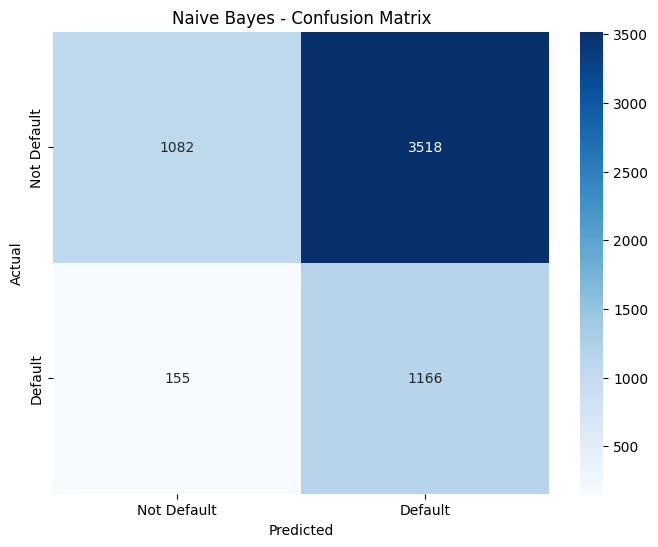

TypeError: evaluate_model() got an unexpected keyword argument 'plotsQ'

In [ ]:
# Initialize the Naive Bayes classifier
nb = GaussianNB()

# Fit the model
nb.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb.predict(X_test)
y_prob_nb = nb.predict_proba(X_test)[:, 1]

# Basic evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Default', 'Default'], 
            yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes - Confusion Matrix')
plt.show()

# Full evaluation using your custom function
nb_results = evaluate_model(nb, X_test, y_test, plotsQ = True)